# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = './Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [113]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.parser import parse

%matplotlib inline  

**Explanation:**


1) First we should load the data from the data folder. We assume that "Data" folder is in the same directory as the notebook. For each spreadsheet in one of subdirectories of "Data/ebola", data is loaded using read_csv function of pandas. For each subdirectory of "Data/ebola" (so for each country) these spreadsheets are appended such that we have a single dataframe for each country (guinea_data, liberia_data, sl_data).

2) The raw data should be processed first to then gather information. In this step necessary processing is done. 
 - Change column names such that dataframes for each country have the same column names
 - add "Month" column
 - parse "Date" columns to standardize it across each row of each dataframe
 - drop unnecessary columns (we assume that "Total" columns gives enough information, so we can drop data for different localities of country. note that there are some discrepancies between sum of all localities' data and given sum which is "Total", however as real datasets are dirty we use it like this)
 - drop rows with irrelevant data. relevance is evaluated by given "Description". 
 - parse data in "Total" column to standartize it, and then convert it to float. (it is written in different formats in different spreadsheets initiall, which is a problem)
 - we want to find "new cases" and "deats", find appropriate "Description"s for "new cases" and "deaths" for different countries. These are written in lists and rows with different description are dropped. These are assumed to signify cumulative values of "new cases" and "deaths" for different countries. these chosen descriptions are given below: 
    guinea_description_new_cases_lst = ['Cumulative (confirmed + probable + suspects)']
    guinea_description_deaths_lst = ['Total deaths (confirmed + probables + suspects)']

    liberia_description_new_cases_lst = ['Total suspected cases', 'Total probable cases', 'Total confirmed cases',                                      'Cumulative (confirmed + probable + suspects)',                                                                    'Cumulative confirmed, probable and suspected cases',                                                              'Cumulative confirmed, probable and suspected cases',                                                              'Total Case/s (Suspected)', 'Total Case/s (Probable)',                                                              'Total case/s (confirmed)']

    liberia_description_deaths_lst = ['Total death/s in confirmed, probable, suspected cases',                                                           'Total death/s in confirmed, \n probable, suspected cases']

    sl_description_new_cases_lst = ['cum_suspected', 'cum_probable', 'cum_confirmed']
    sl_description_deaths_lst = ['death_suspected', 'death_probable', 'death_confirmed'] 
 - for each day cumulative number of new cases and deaths are found for each country in different dataframes
 - at the end, there is a single dataframe for each country. this dataframe has 5 columns which are "Country",      "Date", "Month", "New Cases", "Deaths". Values for "Deaths" and "New Cases" are cumulative numbers. So if we find max and min of these in a month for a country and subtract these from each other and divide to the number of days passed we can approximate the daily average of new cases and deaths for each country in a given month.
 We assume that usin cumulative values of deaths and new cases is more reasonable, because there are days which we do not have spreadsheet which means we cannot know how many new cases and deaths occur in that day. As a result it is impossible to know the daily average of deaths and new cases since we cannot know the total for that month. Also, for such days where we do not have data, deaths and new cases information is provided in cumulative way in other days. So using cumulative information is more reasonable to approximate daily averages.

3) After data is processed and there is a single dataframe for each country, we concatenate these dataframes into a single dataframe named "data". Na values are dropped because they cause discrepancies. After this step "data" dataframe consists of all information we gathered from the given data for our purpose. 

4) Using "data" dataframe the daily average per month of new cases and deaths are calculated for each country. Thhese values are given below.

In [114]:
DATA_FOLDER = "./Data"

In [116]:
# Use the data folder provided in Tutorial 02 - Intro to Pandas.
ebola_path = os.path.join(DATA_FOLDER, "ebola")
ebola_list = ["guinea_data/", "liberia_data/", "sl_data/"]

In [117]:
guinea_description_new_cases_lst = ['Cumulative (confirmed + probable + suspects)']
guinea_description_deaths_lst = ['Total deaths (confirmed + probables + suspects)']

liberia_description_new_cases_lst = ['Total suspected cases', 'Total probable cases', 'Total confirmed cases',
                                        'Cumulative (confirmed + probable + suspects)',
                                     'Cumulative confirmed, probable and suspected cases',
                                     'Cumulative confirmed, probable and suspected cases',
                                     'Total Case/s (Suspected)', 'Total Case/s (Probable)',
                                     'Total case/s (confirmed)']

liberia_description_deaths_lst = ['Total death/s in confirmed, probable, suspected cases',
                                  'Total death/s in confirmed, \n probable, suspected cases']

sl_description_new_cases_lst = ['cum_suspected', 'cum_probable', 'cum_confirmed']
sl_description_deaths_lst = ['death_suspected', 'death_probable', 'death_confirmed']

for i in range(len(ebola_list)):
    path = os.path.join(ebola_path, ebola_list[i])
    lst = os.listdir(path)
    data = []
    #shapes = []
    length = 0
    for l in range(len(lst)):
        path_csv = os.path.join(path, lst[l])
        data_tmp = pd.read_csv(path_csv)
        data.append(data_tmp)
        #shapes.append(data_tmp.shape)
        if l == len(lst)-1:
            #print(len(data))
            if i == 0:
                guinea_data = pd.concat(data, ignore_index=True)
                guinea_data['Country'] = "Guinea"
                
                guinea_data.rename(columns={'Totals': 'Total'}, inplace=True)
                guinea_data['Month'] = guinea_data.Date.apply(lambda d: parse(d).month)
                guinea_data['Day'] = guinea_data.Date.apply(lambda d: parse(d).day)
                guinea_data['Date'] = guinea_data.Date.apply(lambda d: parse(d))
                guinea_data = guinea_data[['Country', 'Description', 'Total', 'Date', 'Month', 'Day']]
                guinea_data = guinea_data[guinea_data['Description'].isin(guinea_description_new_cases_lst + guinea_description_deaths_lst)]
                guinea_data['Total'] = guinea_data.Total.apply(lambda d: d.replace(',', '') if type(d) is str else d)
                guinea_data['Total'] = guinea_data['Total'].astype(float)
                guinea_data['Deaths'] = guinea_data['Total']
                guinea_data.loc[guinea_data['Description'].isin(guinea_description_new_cases_lst), 'Deaths'] = 0
                guinea_data['New Cases'] = guinea_data['Total']
                guinea_data.loc[guinea_data['Description'].isin(guinea_description_deaths_lst), 'New Cases'] = 0
                guinea_data = guinea_data[['Country', 'Month', 'Date', 'Deaths', 'New Cases', 'Day']]
                guinea_data.sort_values('Month', inplace=True)
                guinea_data = guinea_data.groupby(['Country', 'Date','Month']).sum()
                guinea_data.reset_index(inplace=True)
                
            if i == 1:
                liberia_data = pd.concat(data, ignore_index=True)
                liberia_data['Country'] = 'Liberia'
                
                liberia_data.rename(columns={'Variable': 'Description', 'National': 'Total'}, inplace=True)
                liberia_data['Month'] = liberia_data.Date.apply(lambda d: parse(d).month)
                liberia_data['Day'] = liberia_data.Date.apply(lambda d: parse(d).day)
                liberia_data['Date'] = liberia_data.Date.apply(lambda d: parse(d))
                liberia_data = liberia_data[['Country', 'Description', 'Total', 'Date', 'Month', 'Day']]
                liberia_data = liberia_data[liberia_data['Description'].isin(liberia_description_new_cases_lst + liberia_description_deaths_lst)]
                liberia_data['Total'] = liberia_data.Total.apply(lambda d: d.replace(',', '') if type(d) is str else d)
                liberia_data['Total'] = liberia_data['Total'].astype(float)
                liberia_new_cases = liberia_data[liberia_data['Description'].isin(liberia_description_new_cases_lst)].copy()
                liberia_death = liberia_data[liberia_data['Description'].isin(liberia_description_deaths_lst)].copy()
                liberia1_data = liberia_data[['Country', 'Month', 'Date', 'Day']].copy()
                liberia1_data.set_index('Date', inplace=True)
                liberia1_data['New Cases'] = liberia_new_cases.groupby('Date')['Total'].agg({'Total': lambda x: x.sum()/2 if len(x)>1 else x})
                liberia1_data['Deaths'] = liberia_death.groupby('Date')['Total'].agg(['sum'])
                liberia1_data.drop_duplicates(inplace=True)
                liberia1_data.reset_index(level=0, inplace=True)

            if i == 2:
                sl_data = pd.concat(data, ignore_index=True)
                sl_data['Country'] = 'Sierra Leone'
                
                sl_data.rename(columns={'variable': 'Description', 'National': 'Total', 'date': 'Date'}, inplace=True)
                sl_data['Month'] = sl_data.Date.apply(lambda d: parse(d).month)
                sl_data['Day'] = sl_data.Date.apply(lambda d: parse(d).day)
                sl_data['Date'] = sl_data.Date.apply(lambda d: parse(d))
                sl_data = sl_data[['Country', 'Description', 'Total', 'Date', 'Month', 'Day']]
                sl_data['Total'] = sl_data.Total.apply(lambda d: ''.join(filter(lambda x: x.isdigit(), d)) if (type(d) is str) else d)
                sl_data['Total'] = sl_data['Total'].astype(float)
                sl_new_cases = sl_data[sl_data['Description'].isin(sl_description_new_cases_lst)].copy()
                sl_death = sl_data[sl_data['Description'].isin(sl_description_deaths_lst)].copy()
                sl1_data = sl_data[['Country', 'Month', 'Date', 'Day']].copy()
                sl1_data.set_index('Date', inplace=True)
                sl1_data['New Cases'] = sl_new_cases.groupby('Date')['Total'].agg(['sum'])
                sl1_data['Deaths'] = sl_death.groupby('Date')['Total'].agg(['sum'])
                sl1_data.drop_duplicates(inplace=True)
                sl1_data.reset_index(level=0, inplace=True)
                
data = pd.concat([sl1_data, liberia1_data, guinea_data], ignore_index=True)
data.dropna(inplace=True)
data

/Users/guemues/anaconda3/envs/epfl/lib/python3.6/site-packages/ipykernel_launcher.py:67: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


,Country,Date,Day,Deaths,Month,New Cases
0,Sierra Leone,2014-09-07,7,476.0,9,1424.0
1,Sierra Leone,2014-10-30,30,1429.0,10,4487.0
2,Sierra Leone,2014-10-19,19,1259.0,10,3706.0
3,Sierra Leone,2014-10-31,31,1435.0,10,4611.0
4,Sierra Leone,2014-10-18,18,1246.0,10,3624.0
5,Sierra Leone,2014-09-06,6,474.0,9,1409.0
6,Sierra Leone,2014-10-27,27,1419.0,10,4330.0
7,Sierra Leone,2014-09-10,10,493.0,9,1509.0
8,Sierra Leone,2014-09-11,11,498.0,9,1551.0
9,Sierra Leone,2014-10-26,26,1387.0,10,4200.0


In [118]:
for country in ['Sierra Leone', 'Guinea', 'Liberia']:
    country_data = data[data["Country"] == country]
    deaths = country_data.groupby(['Month']).agg({'Deaths': ['min', 'max']})
    new_cases = country_data.groupby(['Month']).agg({'New Cases': ['min', 'max']})
    days = country_data.groupby(['Month']).agg({'Day': ['min', 'max']})

    deaths['diff'] = deaths[('Deaths', 'max')] - deaths[('Deaths', 'min')]
    new_cases['diff'] = new_cases[('New Cases', 'max')] - new_cases[('New Cases', 'min')]
    days['diff'] = days[('Day', 'max')] - days[('Day', 'min')] + 1
    
    print()
    print('{} mountly death average: '.format(country), deaths['diff'] / days['diff'])
    print('{} mountly new cases average: '.format(country), new_cases['diff'] / days['diff'])


Sierra Leone mountly death average:  Month
8      6.600000
9      5.133333
10    27.580645
11    14.482759
12    26.500000
Name: diff, dtype: float64
Sierra Leone mountly new cases average:  Month
8     19.500000
9     40.533333
10    68.741935
11    83.551724
12    81.000000
Name: diff, dtype: float64

Guinea mountly death average:  Month
8     10.818182
9      3.736842
10     0.000000
Name: diff, dtype: float64
Guinea mountly new cases average:  Month
8     4.618182
9     6.649123
10    0.000000
Name: diff, dtype: float64

Liberia mountly death average:  Month
6       2.357143
7       3.230769
8      23.259259
9      35.133333
10     75.064516
11    103.517241
12     14.333333
Name: diff, dtype: float64
Liberia mountly new cases average:  Month
6       2.428571
7       3.980769
8      20.574074
9      34.383333
10    146.629032
11     94.172414
12    428.722222
Name: diff, dtype: float64


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

**Explanation on data file:** Reading the data file. Data is named "metadata.xls" and it is located at DATA folder. os.join will concatanate folder and file in yhe correct way. (which depends on the oparating system)

In [11]:
metadata = pd.read_excel(os.path.join(DATA_FOLDER, "microbiome", "metadata.xls"))

**,MID".join(str(v) for v in range(10)).split(',')[1:]** will generate file names in a list: (MID1,MID2 ...

* find correct row from the metadata file
* read data, name the columns
* and concat the metadata and data




In [105]:
# Write your answer here
dfs = []
for file in ",MID".join(str(v) for v in range(10)).split(',')[1:]:
    meta = metadata[metadata["BARCODE"] == file]
    
    data = pd.read_excel(os.path.join(DATA_FOLDER, "microbiome", "{}.xls".format(file)), header=None, names=['Organism Name', 'Amount'])
    dfs.append(pd.concat([data, meta.append([meta]*data.shape[0],ignore_index=True)], axis=1, join_axes=[data.index]))
task2 = pd.concat(dfs, axis=0, ignore_index=True).fillna("unknown", inplace=False)


To create a new index which is unique we use the coulmns as index first one is **Organism Name** the second one **BARCODE**

In [106]:
task2 = task2.set_index(['Organism Name', 'BARCODE'])
task2

,,Amount,GROUP,SAMPLE
Organism Name,BARCODE,,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",MID1,7,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",MID1,2,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",MID1,3,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",MID1,3,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",MID1,7,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanosarcinales Methanosarcinaceae Methanimicrococcus",MID1,1,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanosarcinales Methermicoccaceae Methermicoccus",MID1,1,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" Archaeoglobi Archaeoglobales Archaeoglobaceae Ferroglobus",MID1,1,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" Archaeoglobi Archaeoglobales Archaeoglobaceae Geoglobus",MID1,1,EXTRACTION CONTROL,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [108]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

**Explanation on data file:** Reading the data file. Data is named "titanic.xls" and it is located at DATA folder. os.join will concatanate folder and file in yhe correct way. (which depends on the oparating system)

In [34]:
# Write your answer here
data = pd.read_excel(os.path.join(DATA_FOLDER, "titanic.xls"))

**Explanation on which data will be categorical**: We assume that 

* boat 
* pcalss
* survived
* name
* sex
* sibsp
* parch
* ticket
* cabin
* embarked
* boat
* dest

can be categorical

In [37]:
data['boat'] = data['boat'].astype('category')
data['pclass'] = data['pclass'].astype('category')
data['survived'] = data['survived'].astype('category')
data['name'] = data['name'].astype('category')
data['sex'] = data['sex'].astype('category')
data['sibsp'] = data['sibsp'].astype('category')
data['parch'] = data['parch'].astype('category')
data['ticket'] = data['ticket'].astype('category')
data['cabin'] = data['cabin'].astype('category')
data['embarked'] = data['embarked'].astype('category')
data['boat'] = data['boat'].astype('category')
data['home.dest'] = data['home.dest'].astype('category')

**Question1: Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical.**

Now we can see minumum value and maximum value for each coloum. As you can see categorical data do not shown any max or min as expected behaviour.

In [38]:
question1 = pd.concat([data.dtypes, data.min(), data.max()], axis=1).rename(columns = dict(zip([0,1,2], ['Type', 'Minumum Value', 'Maximum Value'])))
question1

,Type,Minumum Value,Maximum Value
age,float64,0.1667,80
boat,category,NaN,NaN
body,float64,1,328
cabin,category,NaN,NaN
embarked,category,NaN,NaN
fare,float64,0,512.329
home.dest,category,NaN,NaN
name,category,"Abbing, Mr. Anthony","van Melkebeke, Mr. Philemon"
parch,category,0,9
pclass,category,1,3


**Question2: Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.**

* This question will contain 4 different graph 
* count values in pclass, set title
* count values in embarked, set title
* count values in sex, set title

We use 8 bins to create discreate decade intervals

As maximum age 80 minum age is 0 so maximum is 80 each bin represent 10 age from 0 to 80

* count values in age in 8 bins

Show histogram for all of them

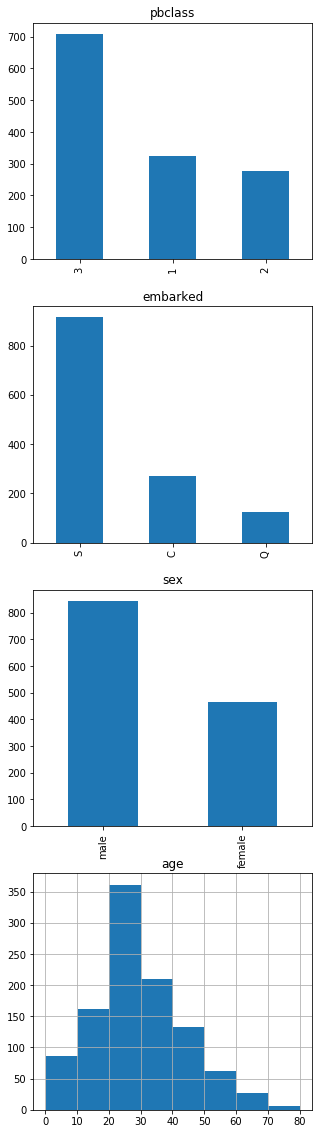

In [45]:
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(5, 20))
axes[0].set_title('pbclass')
data["pclass"].value_counts().plot(ax=axes[0], kind='bar')

axes[1].set_title('embarked')
data["embarked"].value_counts().plot(ax=axes[1], kind='bar')

axes[2].set_title('sex')
data["sex"].value_counts().plot(ax=axes[2], kind='bar')

# We use 8 bins to create discreate decade intervals
# As maximum age 80 minum age is 0 so maximum is 80 each bin represent 10 age from 0 to 80
axes[3].set_title('age')
data["age"].hist(ax=axes[3], bins=8)

**Question3: Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.**

* first take first characters of cabin
* then frop the T characters
* then count each class
* then draw the pie chart

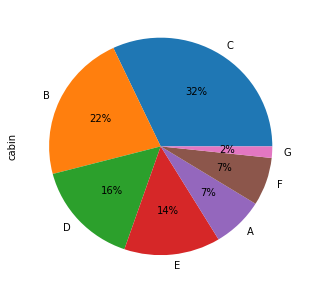

In [46]:
# There will be 1 graph for this question
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# Take all cabins first letter exept T ones. Then drops NA before count them and format the percentages.
cabin_dist = data["cabin"].apply(lambda x: x[0] if x[0] != 'T' else np.nan)
cabin_dist.value_counts(dropna=True).plot.pie(autopct='%.0f%%')


**Question4: For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.**

* We firsst count each survived and not survived persons for each class and then
* rename their index to make more understandable
* sort by index to use same colors in each pie chart
* then plot the chart

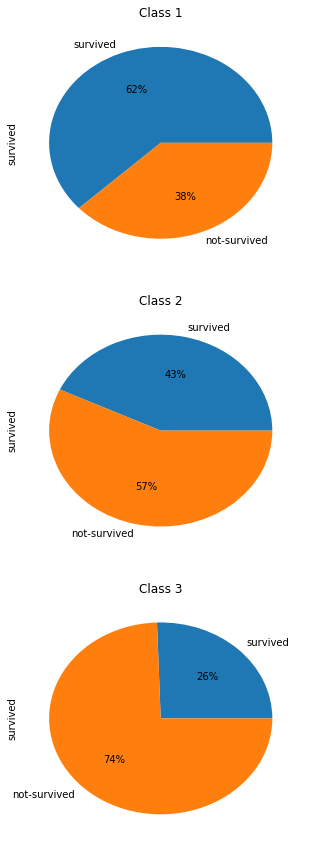

In [61]:
# There will be 3 graph for this question
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(5, 15))

# There is 3 different class, 1,2,3. And label them accordingly.
for i in [1,2,3]:
    axes[i-1].set_title("Class {}".format(str(i)))
    classied = data[data["pclass"] == i]
    classied["survived"].value_counts(dropna=True).rename({1: 'survived', 0: 'not-survived'}).sort_index(ascending=False).plot.pie(ax=axes[i-1], autopct='%.0f%%')


**Question5: Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.**

* first this question have only one large graph prepare it, (15, 5) as size
* then find propotions for each gender and class just like SQL, using group by
* Then prapere the data for visualization
  * crate catogory names for humans
  * add values 
* create bar chart x positions 
* and place preapered data


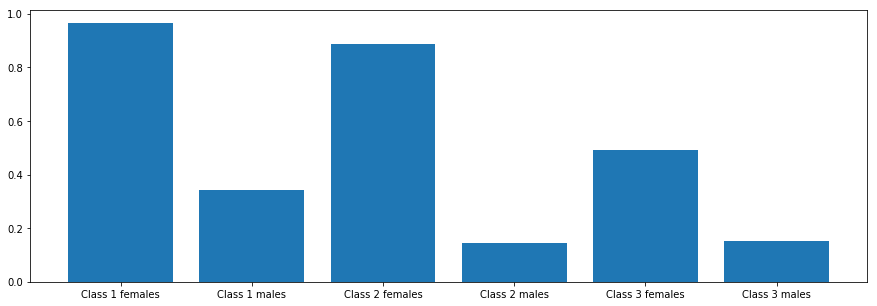

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15, 5))

q5 = data[['pclass', 'sex', 'survived']].copy()
q5['survived'] = q5['survived'].astype('int')
q5 = q5.groupby(['pclass', 'sex']).agg({'survived':'mean'})

category_names = []
values = []
for i in range(len(q5)):
    category_names.append("Class {} {}s".format(*q5.iloc[i].name))
    values.append(q5.iloc[i].get(0))

x_pos = np.arange(len(category_names));
plt.bar(x_pos, values);
plt.xticks(x_pos, category_names);

**Question6: Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.
** 

* First copy data to a new place
* drop NA ages to clear data
* find median age to divide in 2 equal piece
* gouup by 3 different column, **age_category, pclass, sex** and find mean survived ratio

In [102]:
q6 = data[['age', 'pclass','sex', 'survived']].copy()
q6.dropna(subset=['age'], inplace=True)
median_age = q6['age'].median()
q6['age_category'] = q6['age'].apply(lambda x: 0 if x <= median_age else 1)
q6['survived'] = q6['survived'].astype('int')
q6.drop('age', axis=1, inplace=True)
question6 = q6.groupby(['age_category','pclass', 'sex']).agg({'survived':'mean'})


print("Age catagory 0 means: x<{} age, Age catagory 1 means: x>{} age ".format(median_age,median_age))
question6

Age catagory 0 means: x<28.0 age, Age catagory 1 means: x>28.0 age 


survived
age_category pclass sex             
0            1      female  0.951220
                    male    0.531250
             2      female  0.910714
                    male    0.216216
             3      female  0.513761
                    male    0.183036
1            1      female  0.967391
                    male    0.302521
             2      female  0.872340
                    male    0.083333
             3      female  0.372093
                    male    0.144000